In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Зарандомим ГС, у которой экспоненциальное распределение с помощью функции генератора np.random.exponential() с достаточно большим количеством наблюдений

In [3]:
np.random.seed(5)
population_data = np.random.exponential(size=100000)

In [4]:
population_data[:50]

array([2.51019977e-01, 2.04586988e+00, 2.31577965e-01, 2.50851402e+00,
       6.70234080e-01, 9.46090010e-01, 1.45204047e+00, 7.30678736e-01,
       3.52114646e-01, 2.07911683e-01, 8.41876606e-02, 1.34109271e+00,
       5.82159130e-01, 1.72343346e-01, 2.11973893e+00, 3.20324365e-01,
       5.34836626e-01, 3.51090470e-01, 9.90981706e-01, 8.67114476e-01,
       9.16113739e-01, 3.08999847e-01, 3.35033505e-01, 2.92477828e-01,
       3.96848262e-01, 1.55676861e-01, 1.81057789e-01, 3.32230845e+00,
       3.22455983e+00, 2.08765729e-01, 2.46068419e-02, 2.28854259e-01,
       1.20345165e+00, 1.51192373e+00, 2.32001466e-02, 8.61951370e-01,
       1.64352256e-03, 7.24581321e-01, 1.02108245e+00, 4.24222315e+00,
       2.99886371e-01, 1.62200092e+00, 2.04394380e+00, 2.56070337e+00,
       2.21666753e-03, 6.33913402e-01, 3.98829611e+00, 5.09068508e-01,
       1.68057135e+00, 7.90664089e-01])

Теперь возьмём 2000 выборок по 50 наблюдений и посчитаем в них среднее, чтобы получить распределение из 2000 средних 

In [5]:
n = 50 # объём выборки

Для удобства соберем матрицу из рандомных выборок из ГС размером 50

In [7]:
n_rows = int(len(population_data)/n)
samples_data = np.matrix([np.random.choice(population_data, size=n) for i in range(n_rows)])

In [8]:
samples_data.shape

(2000, 50)

In [9]:
samples_data = pd.DataFrame(samples_data)
samples_data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.546820,0.030973,1.691875,0.275260,5.382071,1.363440,1.496238,0.179635,0.084198,0.192882,...,0.172275,1.549280,0.129879,3.462012,1.439712,0.815756,1.882568,0.093038,2.087777,0.790641
1,0.783076,1.216050,0.095799,1.514848,2.708712,0.998080,0.335536,0.148701,0.271368,0.600135,...,0.897769,2.516357,0.193461,1.508246,0.881194,2.336106,0.943423,2.231479,0.143796,0.998559
2,0.427969,0.079839,2.107683,0.330833,0.584049,1.251764,0.824719,0.401033,0.813011,0.016828,...,0.144868,0.359973,0.301601,2.134367,1.857827,4.015557,0.008156,0.038201,3.554776,0.143861
3,0.016945,0.198845,3.022242,0.727668,0.877756,0.314948,1.105402,2.318593,0.259139,0.694447,...,0.218073,0.715184,2.200124,0.381138,0.680963,0.212398,0.017268,1.168087,0.174537,1.004237
4,0.662322,0.116940,0.470133,0.318679,0.596168,5.993099,0.443646,1.164510,1.384221,0.182669,...,0.510562,0.355759,0.838578,0.083814,0.223933,0.481749,0.653260,2.182331,0.225690,2.306122


Cчитаем выборочные средние по каждой строчке (= выборке)

In [10]:
means = samples_data.mean(axis=1)

sample_means = pd.DataFrame({'means': means})
sample_means

,means
0,1.237917
1,1.017874
2,0.969454
3,0.785387
4,0.815924
...,...
1995,0.920607
1996,1.098931
1997,0.844087
1998,0.818615


## Визуализируем

Согласно ЦПТ, средние выборок, взятые из ГС будут распределены нормально и их среднее будет примерно таким же, как мат. ожидание ГС

Text(0, 0.5, 'density')

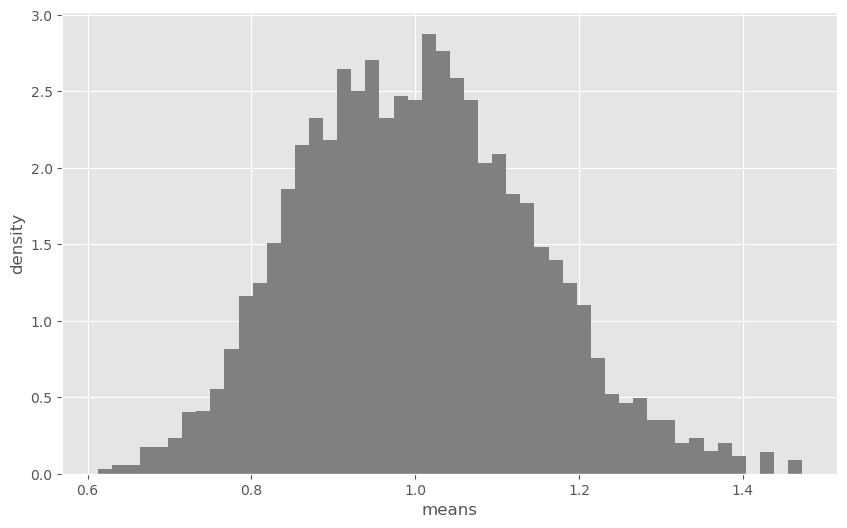

In [11]:
viz = sample_means.means.plot(kind='hist', 
                                color="grey", 
                                bins=50, 
                                density=True,
                                figsize=(10,6))
viz.set_xlabel("means")
viz.set_ylabel("density")

In [12]:
# И да, действительно средние равны
round(np.mean(sample_means.means),1) == round(np.mean(population_data),1)

True

In [13]:
np.mean(sample_means.means)

1.0022359652066353

In [14]:
np.mean(population_data)

1.0029708894298444

## Мы можем посчитать стандартную ошибку для выборочного среднего

In [15]:
def get_se(x):
    return np.std(x) / np.sqrt(len(x))

## И границы 95% доверительного интервала для того же выборочного среднего

In [21]:
def get_ci_95(x):
    ci_upper = np.mean(x) + 1.96*get_se(x)
    ci_lower = np.mean(x) - 1.96*get_se(x)
    return {"ci_lower": ci_lower,
            "ci_upper": ci_upper}

Получим 95% границы ДИ для выборки (возьмем первую строчку)

В этот интервал точно будет попадать среднее ГС

In [17]:
get_ci_95(samples_data[0])

{'ci_lower': 0.9709209683735169, 'ci_upper': 1.0606184477744542}

In [18]:
np.mean(population_data)

1.0029708894298444

Это почти тоже самое если бы мы брали ДИ по СКО из распределения средних (вместо стандартного ошибки):

Они будут достаточно близки по значениям

In [19]:
np.std(sample_means.means)

0.14215643550786297

In [20]:
get_se(samples_data[0])

0.022882010051259498